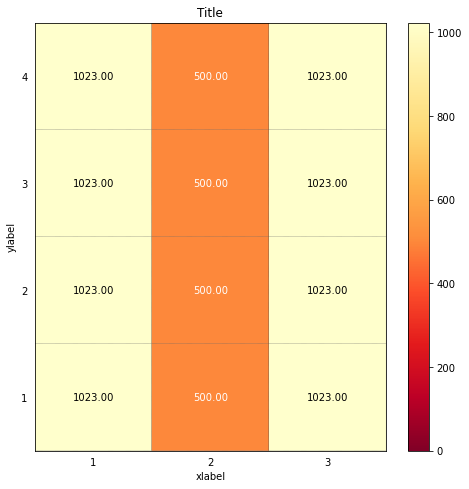

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: http://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.axes
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)

def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: http://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

def heatmap(fig, ax, AUC, title, xlabel, ylabel, xticklabels, yticklabels):
    '''
    Inspired by:
    - http://stackoverflow.com/a/16124677/395857 
    - http://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    #fig, ax = plt.subplots()    
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='YlOrRd_r', vmin=0.0, vmax=1023.0)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # resize 
    fig = plt.gcf()
    fig.set_size_inches(cm2inch(20, 20))



def main():

    fig, ax = plt.subplots()    

    for i in range(100):
        data = np.random.randint(0,1023,(4,3))

        x_axis_size = data.shape[1]
        y_axis_size = data.shape[0]
        title = "Title"
        xlabel= "xlabel"
        ylabel="ylabel"
        xticklabels = range(1, x_axis_size+1) # could be text
        yticklabels = range(1, y_axis_size+1) # could be text   
        heatmap(fig, ax,data, title, xlabel, ylabel, xticklabels, yticklabels)
        #plt.savefig('image_output.png', dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
        #plt.show()
    

if __name__ == "__main__":
    main()
    #cProfile.run('main()') # if you want to do some profiling

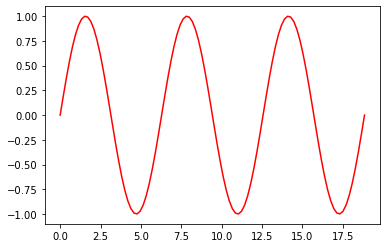

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 6*np.pi, 100)
y = np.sin(x)

# You probably won't need this if you're embedding things in a tkinter plot...
plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, 'r-') # Returns a tuple of line objects, thus the comma

for phase in np.linspace(0, 10*np.pi, 500):
    line1.set_ydata(np.sin(x + phase))
    fig.canvas.draw()
    fig.canvas.flush_events()

In [7]:
import numpy as np
np.random.randint(0,1023,(4,3))

array([[544, 182, 175],
       [747, 564, 396],
       [526, 792, 697],
       [900, 259, 917]])

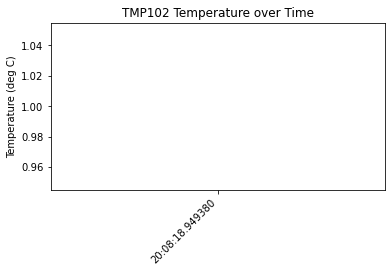

In [3]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xs = []
ys = []


# This function is called periodically from FuncAnimation
def animate(i, xs, ys):

    # Read temperature (Celsius) from TMP102
    temp_c = 1

    # Add x and y to lists
    xs.append(dt.datetime.now().strftime('%H:%M:%S.%f'))
    ys.append(temp_c)

    # Limit x and y lists to 20 items
    xs = xs[-20:]
    ys = ys[-20:]

    # Draw x and y lists
    ax.clear()
    ax.plot(xs, ys)

    # Format plot
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.30)
    plt.title('TMP102 Temperature over Time')
    plt.ylabel('Temperature (deg C)')

# Set up plot to call animate() function periodically
ani = animation.FuncAnimation(fig, animate, fargs=(xs, ys), interval=1000)
plt.show()

In [8]:
!pip install pyserial

In [22]:
import serial
import time
ser.close()
ser = serial.Serial('COM5', 9600)
time.sleep(1)

# Read and record the data
data =[]                       # empty list to store the data
for i in range(3):
    b = ser.readline()         # read a byte string
    string_n = b.decode()  # decode byte string into Unicode  
    string = string_n.rstrip() # remove \n and \r
    #flt = float(string)        # convert string to float
    print(string.split("\t"))
    data = string.split("\t")
    time.sleep(0.1)            # wait (sleep) 0.1 seconds

ser.close()
print(data)

['0', '50', '100', '150', '200', '250', '300', '350', '400', '450', '500', '550']
['0', '50', '100', '150', '200', '250', '300', '350', '400', '450', '500', '550']
['0', '50', '100', '150', '200', '250', '300', '350', '400', '450', '500', '550']
['0', '50', '100', '150', '200', '250', '300', '350', '400', '450', '500', '550']


In [11]:
!pip uninstall serial

^C


In [27]:
import numpy as np
np.array([data], dtype='float').reshape(4,3)

array([[  0.,  50., 100.],
       [150., 200., 250.],
       [300., 350., 400.],
       [450., 500., 550.]])